In [1]:
import subprocess
import psutil
import time
import pandas as pd
import numpy as np

def open_browser(url):
    subprocess.Popen(['C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe', url])

def monitor_ram(process_name, iter):
    tot_mean = np.zeros(iter)
    for i in range(iter):
        tab = 0
        tot = 0
        for process in psutil.process_iter(['pid', 'name', 'memory_info']): # _full
            if process.info['name'] == process_name:
                pid = process.info['pid']
                memory_info = process.info['memory_info'] # _full
                mem = memory_info.private / (1024 ** 2)
                print(f"PID: {pid}, RAM Usage: {mem:.2f} MB")
                tab = np.max([tab, mem])
                tot = tot + mem
        print('--------------------------------------')
        print(tot)
        print('--------------------------------------')
        tot_mean[i] = tot
        time.sleep(5)
    return np.mean(tot_mean), tab

def close_browser(process_name):
    for process in psutil.process_iter(['pid', 'name']):
        if process.info['name'] == process_name:
            pid = process.info['pid']
            try:
                # Terminate the process
                psutil.Process(pid).terminate()
                print(f"Browser with PID {pid} terminated.")
            except psutil.NoSuchProcess:
                pass

In [14]:
pandas = pd.read_csv('one_stats_new.csv')
pandas[10:20]

,Name,FITS,HIcont,HIcont_p,Voxels,Image size,RMS,High/No,High/Yes,Tri2,Tri3,Tri5,Levels,Split,T_RAM,P_RAM
10,H19,63.007,110654.0,0.670018,16515072.0,0.516481,0.000605,22.095,highyes,3.326,1.089,0.367,3.0,1.0,1633.345703,1267.359375
11,HCG22_0_0_0_0_0,279.006,51350.0,0.070210,73138176.0,6.840398,0.000612,11.218,highyes,1.870,0.617,0.127,3.0,1.0,1202.792969,858.007812
12,HCG23,108.572,171113.0,0.601257,28459200.0,0.416895,0.000618,28.776,highyes,4.715,1.809,0.520,3.0,1.0,1578.187500,1115.101562
13,HCG25,54.006,26353.0,0.186164,14155776.0,0.725591,0.000468,4.728,highyes,0.709,0.276,0.074,3.0,1.0,1132.375977,801.800781
14,HCG26,63.009,27292.0,0.165255,16515072.0,0.186773,0.000668,7.022,highyes,1.064,0.350,0.088,3.0,1.0,920.958984,805.734375
15,HCG30,56.006,20120.0,0.137057,14680064.0,0.726524,0.000494,4.430,highyes,0.732,0.253,0.067,3.0,1.0,1196.348633,898.117188
16,HCG31,15.760,24236.0,0.587003,4128768.0,0.020127,0.000602,2.939,highyes,0.513,0.189,0.067,3.0,1.0,1089.377930,798.109375
17,HCG33,3.510,1886.0,0.205558,917504.0,0.011776,0.000785,0.398,highyes,0.074,0.038,0.026,3.0,1.0,785.720703,816.445312
18,HCG37A,83.007,52500.0,0.241291,21757952.0,0.834103,0.000718,11.997,highyes,1.884,0.634,0.162,3.0,1.0,1250.026367,892.304688
19,HCG38,343.007,53566.0,0.059574,89915392.0,1.316942,0.001228,13.070,highyes,2.116,0.688,0.188,3.0,1.0,1285.361328,920.667969


In [15]:
open_browser('localhost/stats1/one_HCG38_highno.html')

time.sleep(20)

a = monitor_ram('chrome.exe', 6)
print(a)

PID: 1004, RAM Usage: 6.59 MB
PID: 3192, RAM Usage: 22.15 MB
PID: 22812, RAM Usage: 822.74 MB
PID: 24580, RAM Usage: 161.56 MB
PID: 28408, RAM Usage: 71.56 MB
PID: 29928, RAM Usage: 14.90 MB
PID: 30196, RAM Usage: 19.09 MB
--------------------------------------
1118.59765625
--------------------------------------
PID: 1004, RAM Usage: 6.59 MB
PID: 3192, RAM Usage: 22.15 MB
PID: 22812, RAM Usage: 822.74 MB
PID: 24580, RAM Usage: 162.87 MB
PID: 28408, RAM Usage: 71.56 MB
PID: 29928, RAM Usage: 14.90 MB
PID: 30196, RAM Usage: 19.09 MB
--------------------------------------
1119.90234375
--------------------------------------
PID: 1004, RAM Usage: 6.46 MB
PID: 3192, RAM Usage: 22.15 MB
PID: 22812, RAM Usage: 822.79 MB
PID: 24580, RAM Usage: 164.19 MB
PID: 28408, RAM Usage: 71.62 MB
PID: 29928, RAM Usage: 14.90 MB
PID: 30196, RAM Usage: 19.15 MB
--------------------------------------
1121.2578125
--------------------------------------
PID: 1004, RAM Usage: 6.46 MB
PID: 3192, RAM Usage: 22.1

In [3]:
for i in range(len(pandas['Name'])):
    if i<5:
        meerk = '_meerkat'
    else:
        meerk = ''
    url_to_open = "localhost/stats1/one_%s_highno%s.html"%(pandas['Name'][i],meerk)  # Replace with your desired URL
    browser_process_name = "chrome.exe"  # Adjust for the browser you're using (e.g., "firefox.exe" for Firefox)

    open_browser(url_to_open)

    # Allow some time for the browser to open before monitoring
    sl = pandas['High/No'][i]/10
    if sl<5:
        sl = 5
    time.sleep(sl)

    ram = monitor_ram(browser_process_name, 4)
    print(ram)
    pandas['T_RAM'][i] = ram[0]
    pandas['P_RAM'][i] = ram[1]
    
    close_browser(browser_process_name)


PID: 11544, RAM Usage: 1045.76 MB
PID: 17272, RAM Usage: 14.84 MB
PID: 23828, RAM Usage: 6.57 MB
PID: 24324, RAM Usage: 22.03 MB
PID: 25164, RAM Usage: 1634.09 MB
PID: 28644, RAM Usage: 71.11 MB
PID: 28676, RAM Usage: 18.94 MB
--------------------------------------
2813.33984375
--------------------------------------
PID: 11544, RAM Usage: 1046.06 MB
PID: 17272, RAM Usage: 14.84 MB
PID: 23828, RAM Usage: 6.57 MB
PID: 24324, RAM Usage: 22.03 MB
PID: 25164, RAM Usage: 1600.83 MB
PID: 28644, RAM Usage: 71.04 MB
PID: 28676, RAM Usage: 18.94 MB
--------------------------------------
2780.3125
--------------------------------------
PID: 11544, RAM Usage: 1046.39 MB
PID: 17272, RAM Usage: 14.84 MB
PID: 23828, RAM Usage: 6.57 MB
PID: 24324, RAM Usage: 22.03 MB
PID: 25164, RAM Usage: 1600.83 MB
PID: 28644, RAM Usage: 70.82 MB
PID: 28676, RAM Usage: 18.95 MB
--------------------------------------
2780.43359375
--------------------------------------
PID: 11544, RAM Usage: 1047.91 MB
PID: 17272, R

C:\Users\ixaka\AppData\Local\Temp\ipykernel_16768\3376892813.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas['T_RAM'][i] = ram[0]
C:\Users\ixaka\AppData\Local\Temp\ipykernel_16768\3376892813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandas['P_RAM'][i] = ram[1]


Browser with PID 11544 terminated.
Browser with PID 17272 terminated.
Browser with PID 23828 terminated.
Browser with PID 24324 terminated.
Browser with PID 25164 terminated.
Browser with PID 28644 terminated.
Browser with PID 28676 terminated.
PID: 2428, RAM Usage: 18.65 MB
PID: 13968, RAM Usage: 14.86 MB
PID: 16640, RAM Usage: 6.59 MB
PID: 21308, RAM Usage: 70.88 MB
PID: 23900, RAM Usage: 796.70 MB
PID: 26384, RAM Usage: 1476.36 MB
PID: 27392, RAM Usage: 19.91 MB
--------------------------------------
2403.9453125
--------------------------------------
PID: 2428, RAM Usage: 18.70 MB
PID: 13968, RAM Usage: 14.86 MB
PID: 16640, RAM Usage: 6.59 MB
PID: 21308, RAM Usage: 70.83 MB
PID: 23900, RAM Usage: 794.15 MB
PID: 26384, RAM Usage: 1445.18 MB
PID: 27392, RAM Usage: 19.91 MB
--------------------------------------
2370.22265625
--------------------------------------
PID: 2428, RAM Usage: 18.68 MB
PID: 13968, RAM Usage: 14.86 MB
PID: 16640, RAM Usage: 6.59 MB
PID: 21308, RAM Usage: 70.72

In [6]:
pandas

,Name,FITS,HIcont,HIcont_p,Voxels,Image size,RMS,High/No,High/Yes,Tri2,Tri3,Tri5,Levels,Split,T_RAM,P_RAM
0,HCG90,1101.569,422776.0,0.146431,2.887200e+08,3.293657,0.000283,138.631,highyes,19.423,5.764,1.255,3.0,1.0,2791.797852,1612.410156
1,HCG97,499.853,351780.0,0.268534,1.310000e+08,2.771029,0.000344,97.219,highyes,15.351,4.818,1.120,3.0,1.0,2382.016602,1456.152344
2,HCG30,5413.620,2110046.0,0.148687,1.419120e+09,1.000606,0.000301,626.815,highyes,0.000,0.000,0.000,3.0,4.0,302.550781,173.707031
3,HCG31,2624.680,1012686.0,0.147193,6.880000e+08,2.783394,0.000271,349.463,highyes,47.969,14.269,2.975,3.0,2.0,4695.4375,2390.664062
4,HCG16,300.591,156266.0,0.198376,7.877250e+07,4.059416,0.000363,41.311,highyes,6.033,1.876,0.414,3.0,1.0,1467.931641,916.714844
5,HCG2,15.760,27823.0,0.673881,4.128768e+06,0.324387,0.000841,4.013,highyes,0.330,0.155,0.067,3.0,1.0,1134.051758,834.960938
6,H07,55.006,47693.0,0.330790,1.441792e+07,0.503733,0.000300,12.365,highyes,2.217,0.784,0.120,3.0,1.0,1222.46582,817.628906
7,HCG10,54.006,29893.0,0.211172,1.415578e+07,0.877864,0.000418,3.997,highyes,0.641,0.247,0.074,3.0,1.0,1102.125,809.277344
8,HCG15,55.006,17262.0,0.119726,1.441792e+07,0.725673,0.000471,4.279,highyes,0.655,0.235,0.064,3.0,1.0,1126.355469,826.023438
9,HCG16,63.007,57005.0,0.345170,1.651507e+07,0.327804,0.000400,7.732,highyes,1.215,0.423,0.131,3.0,1.0,1186.082031,815.976562


In [8]:
pandas.to_csv('one_stats_new.csv', index=False)

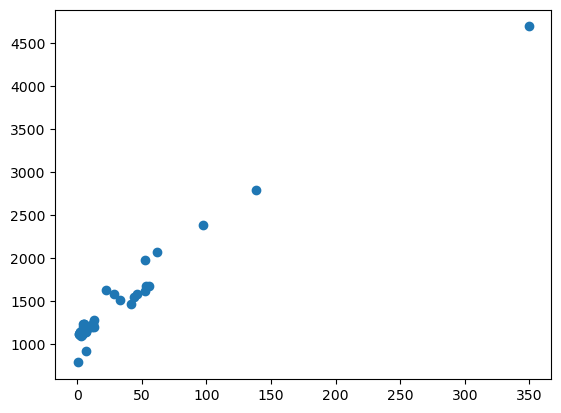

In [17]:
import matplotlib.pyplot as plt
plt.plot(pandas['High/No'], pandas['T_RAM'], 'o')
# plt.yscale('log')
# plt.xscale('log')